# 210409 Fix Component 12

In [1]:
const COMPONENT = 12;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10389997312555914849\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11725915260819464193\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10389997312555914849\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,1792,351187,Salinispora pacifica,species,196,1,NaN,1,27,3,0.804802,2,1,pacifica
2,986,1050199,Salinispora oceanensis,species,196,1,NaN,1,3,2,0.274897,1,1,oceanensis
3,478,999544,Salinispora vitiensis,species,196,1,NaN,1,2,1,0.00175215,0,1,vitiensis


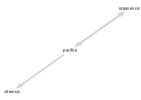

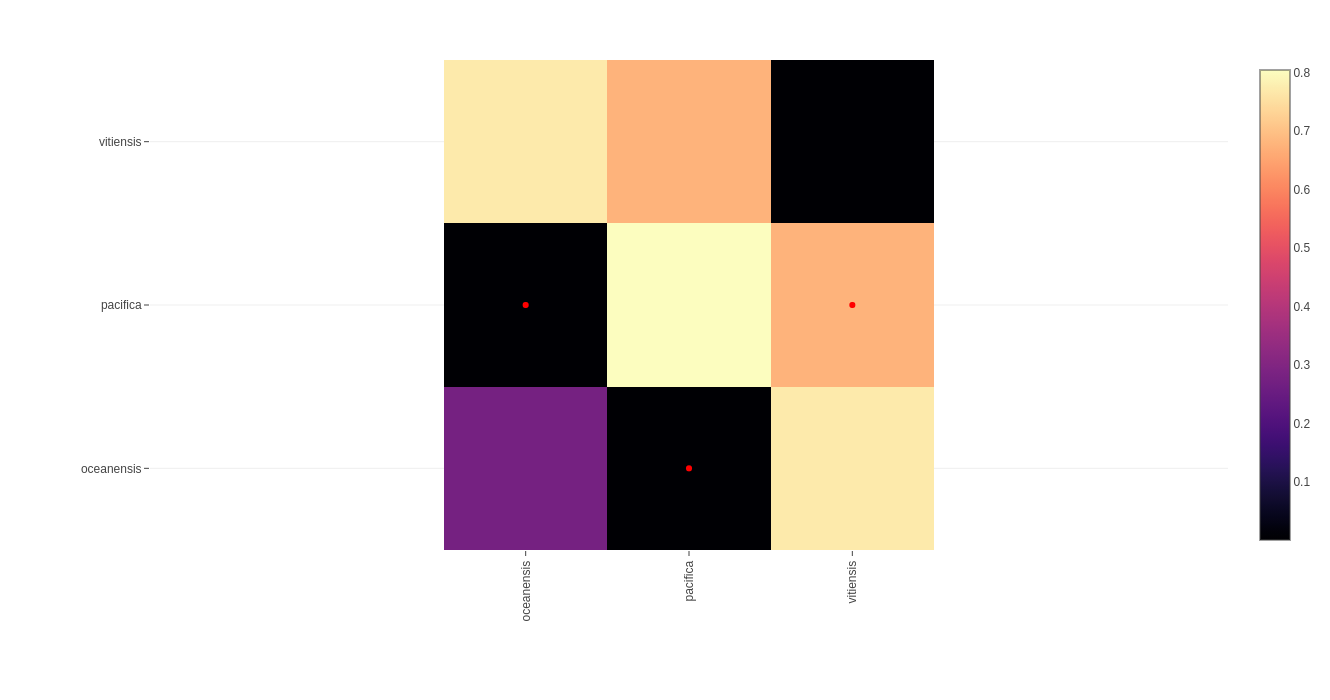

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

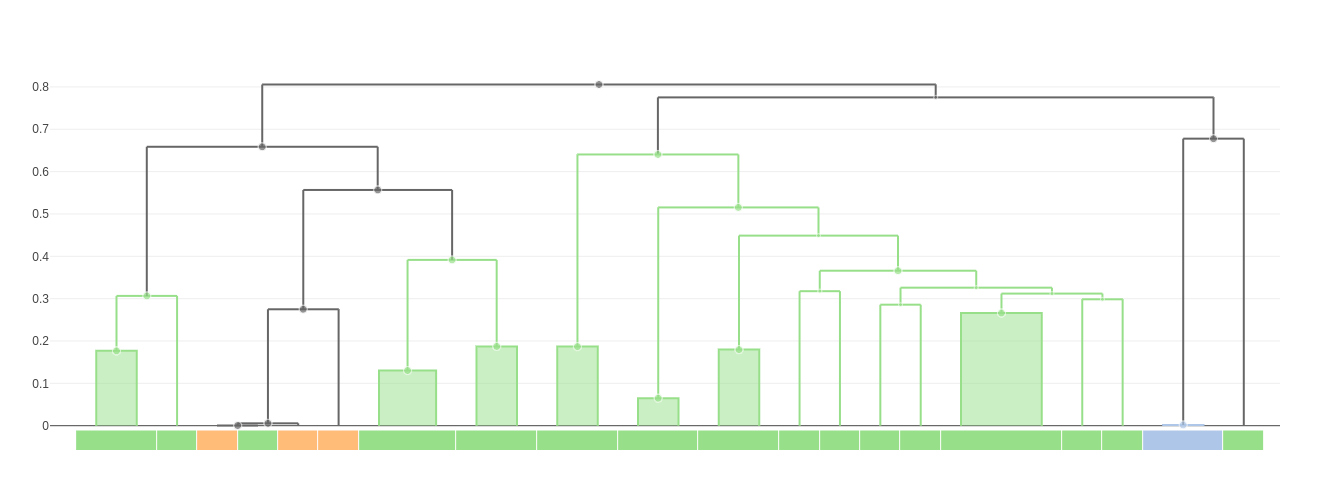

In [4]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa)
plot(dendrogram(cdata, trees["all"]))

## Edits

### pacifica

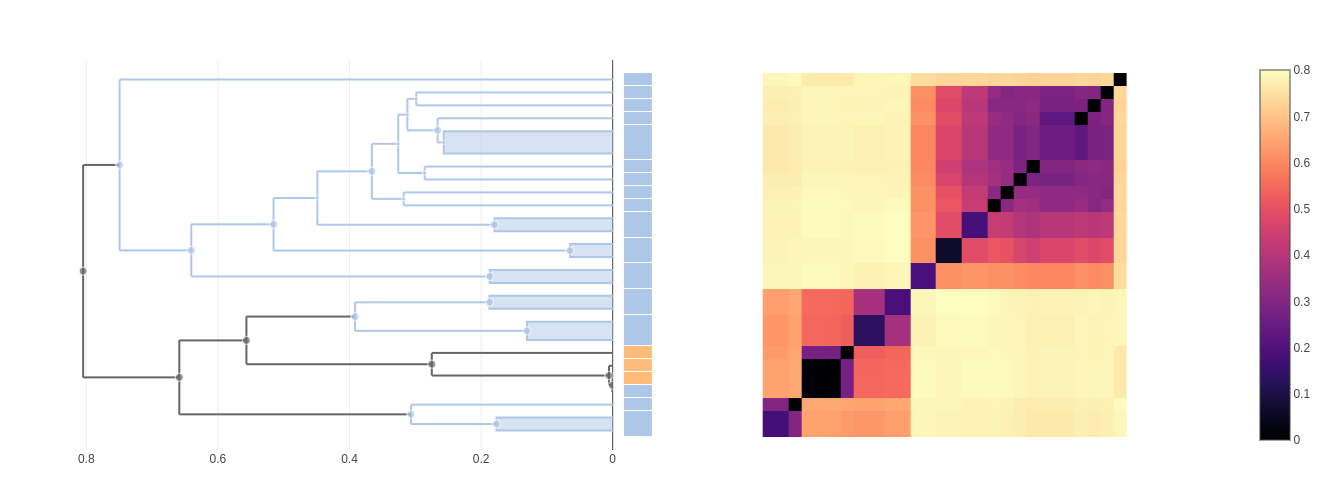

In [9]:
plot(multi_clustermap(cdata, ["pacifica", "oceanensis"]))

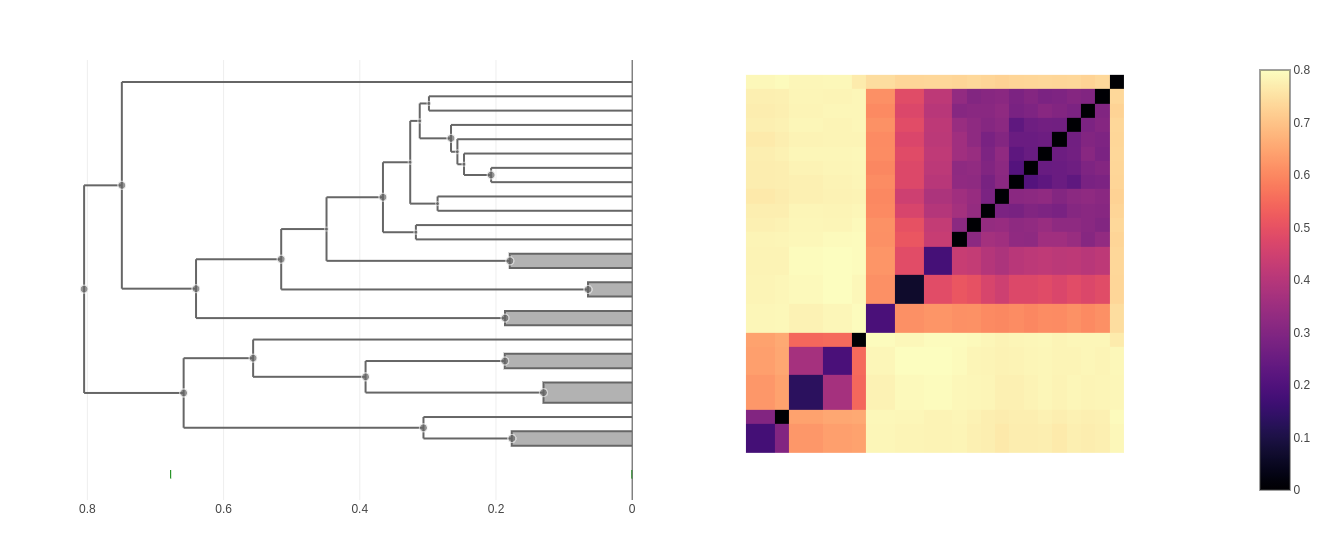

In [5]:
let taxon = "pacifica"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [6]:
split_taxon!(edits, trees["pacifica"], [50, 46, 41])

Subgroup 1 size: 17
Subgroup 2 size: 5
Subgroup 3 size: 3
Genomes to delete: 2


## Finish

In [7]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Missing,String
1,3,pacifica,27,0.804802,0,2,"17, 5, 3",missing,"0.6405, 0.3915, 0.3065"
